In [1]:
cd ..

/Users/Amar/Dropbox/Computer_Science/GATECH-OMSCS/7641_ML/GT_ML_Project_1


In [2]:
%run __init__.py

In [3]:
%run src/load_data.py

In [5]:
from lib.benchmark import run_model, plot_results
from lib.benchmark import pipeline_basic, pipeline_scale, pipeline_deskew
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
from tqdm import tqdm
sns.set()

In [6]:
adt_data = data['adult']['train']['engineered']
adt_lbls = data['adult']['train']['labels']
mad_data = data['madelon']['train']['raw_data']
mad_lbls = data['madelon']['train']['labels']

In [7]:
cls = pipeline_deskew(SVC)

# Madelon

In [12]:
param_grid = {
    'svc__kernel' : ['linear','poly', 'rbf'],
    'svc__C' : [0.01,0.1,1.0,5.0]
}

gs_madelon = GridSearchCV(cls, param_grid,cv = StratifiedKFold(),verbose = 2, n_jobs=-1, scoring='f1')
gs_madelon.fit(mad_data, mad_lbls);

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] svc__kernel=linear, svc__C=0.01 .................................
[CV] svc__kernel=linear, svc__C=0.01 .................................
[CV] svc__kernel=linear, svc__C=0.01 .................................
[CV] svc__kernel=poly, svc__C=0.01 ...................................
[CV] .................. svc__kernel=linear, svc__C=0.01, total=   2.3s
[CV] .................. svc__kernel=linear, svc__C=0.01, total=   2.4s
[CV] svc__kernel=poly, svc__C=0.01 ...................................
[CV] svc__kernel=poly, svc__C=0.01 ...................................
[CV] .................. svc__kernel=linear, svc__C=0.01, total=   2.5s
[CV] svc__kernel=rbf, svc__C=0.01 ....................................
[CV] .................... svc__kernel=poly, svc__C=0.01, total=   2.7s
[CV] svc__kernel=rbf, svc__C=0.01 ....................................
[CV] .................... svc__kernel=poly, svc__C=0.01, total=   2.9s
[CV] svc__kernel

[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  4.8min finished


In [14]:
print(gs_madelon.best_params_)
mad_res = pd.DataFrame(gs_madelon.cv_results_)
print(mad_res.shape)
mad_res.columns

{'svc__kernel': 'poly', 'svc__C': 0.01}
(12, 18)


Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_svc__C', 'param_svc__kernel', 'params',
       'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'std_fit_time', 'std_score_time',
       'std_test_score', 'std_train_score'],
      dtype='object')

# Adult 

In [13]:
gs_adult = GridSearchCV(cls, param_grid, n_jobs=-1,cv = StratifiedKFold(), scoring='f1', verbose = 1)
gs_adult.fit(adt_data, adt_lbls)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 13.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(10, 11))), ('functiontransformer', FunctionTransformer(accept_sparse=False, func=<ufunc 'log'>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
          validate=True)), ('standardscaler', StandardScale...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'svc__kernel': ['linear', 'poly', 'rbf'], 'svc__C': [0.01, 0.1, 1.0, 5.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [15]:
print(gs_adult.best_params_)
adl_res = pd.DataFrame(gs_adult.cv_results_)
print(adl_res.shape)
adl_res.columns

{'svc__kernel': 'linear', 'svc__C': 1.0}
(12, 18)


Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_svc__C', 'param_svc__kernel', 'params',
       'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'std_fit_time', 'std_score_time',
       'std_test_score', 'std_train_score'],
      dtype='object')

# Plotting

(0, 0.85)

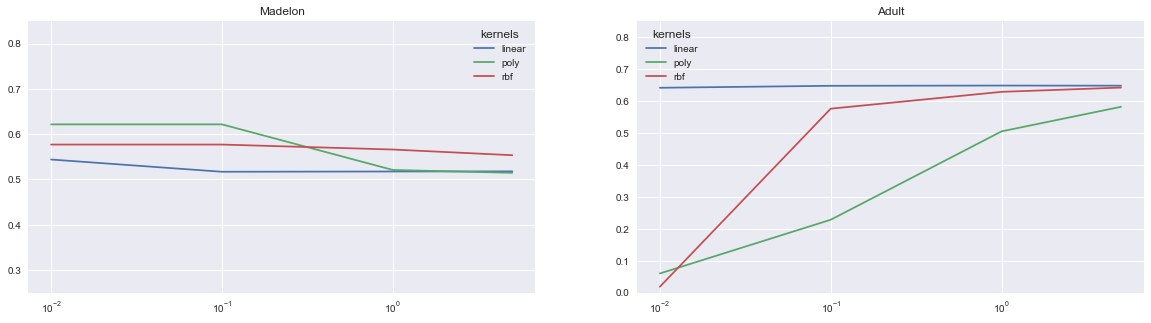

In [16]:
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,2,1)
dt_results = pd.DataFrame(gs_adult.cv_results_)
plt.plot(mad_res[mad_res['param_svc__kernel'] == 'linear']['param_svc__C'],
         mad_res[mad_res['param_svc__kernel'] == 'linear']['mean_test_score'], label="linear")
plt.plot(mad_res[mad_res['param_svc__kernel'] == 'poly']['param_svc__C'],
         mad_res[mad_res['param_svc__kernel'] == 'poly']['mean_test_score'], label="poly")
plt.plot(mad_res[mad_res['param_svc__kernel'] == 'rbf']['param_svc__C'],
         mad_res[mad_res['param_svc__kernel'] == 'rbf']['mean_test_score'], label="rbf")
plt.legend(title = 'kernels')
plt.title("Madelon")
plt.xscale('log')
plt.ylim(0.25,0.85)

fig.add_subplot(1,2,2)
dt_results = pd.DataFrame(gs_madelon.cv_results_)
plt.plot(adl_res[adl_res['param_svc__kernel'] == 'linear']['param_svc__C'],
         adl_res[adl_res['param_svc__kernel'] == 'linear']['mean_test_score'], label="linear")
plt.plot(adl_res[adl_res['param_svc__kernel'] == 'poly']['param_svc__C'],
         adl_res[adl_res['param_svc__kernel'] == 'poly']['mean_test_score'], label="poly")
plt.plot(adl_res[adl_res['param_svc__kernel'] == 'rbf']['param_svc__C'],
         adl_res[adl_res['param_svc__kernel'] == 'rbf']['mean_test_score'], label="rbf")
plt.legend(title = "kernels")
plt.title('Adult')
plt.xscale('log')
plt.ylim(0,0.85)

In [18]:
mad_res.to_pickle("results/SVM_GS_madelon.p")
adl_res.to_pickle("results/SVM_GS_adult.p")

Text(0.5,1,'Adult')

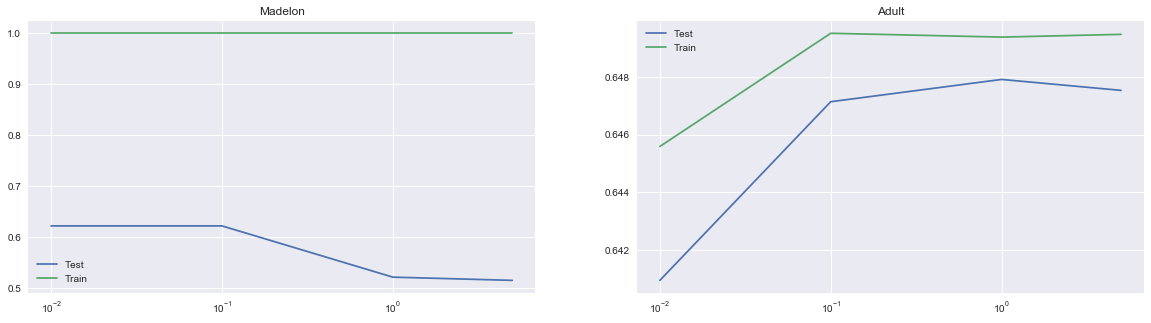

In [21]:
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,2,1)
plt.plot(mad_res[(mad_res['param_svc__kernel'] == 'poly')]['param_svc__C'],
         mad_res[(mad_res['param_svc__kernel'] == 'poly')]['mean_test_score'], label = "Test")
plt.plot(mad_res[(mad_res['param_svc__kernel'] == 'poly')]['param_svc__C'],
         mad_res[(mad_res['param_svc__kernel'] == 'poly')]['mean_train_score'], label = "Train")
plt.legend()
plt.xscale('log')
plt.title("Madelon")


fig.add_subplot(1,2,2)
plt.plot(adl_res[adl_res['param_svc__kernel'] == 'linear']['param_svc__C'],
         adl_res[adl_res['param_svc__kernel'] == 'linear']['mean_test_score'], label = "Test")
plt.plot(adl_res[adl_res['param_svc__kernel'] == 'linear']['param_svc__C'],
         adl_res[adl_res['param_svc__kernel'] == 'linear']['mean_train_score'], label = "Train")
plt.legend()
plt.xscale('log')
plt.title("Adult")